<a href="https://colab.research.google.com/github/rhdtka21/Intro-To-AI/blob/master/HW5_SeokJungwoo_2015003209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load MNIST dataset from PyTorch

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          download=True)

### Data type conversion

In [146]:
# Change data type : torch.Tensor -> numpy array
X = train_dataset.train_data.numpy()
y = train_dataset.train_labels.numpy()

X_test = test_dataset.test_data.numpy()
y_test = test_dataset.test_labels.numpy()

print('Data size (train): ' + str(X.shape))
print('Data size (test): ' + str(X.shape))

num_samples, height, width = X.shape
dim = height * width

Data size (train): (60000, 28, 28)
Data size (test): (60000, 28, 28)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### Data Preprocessing

In [147]:
# Train Data 생성
Xtr_01 = []
ytr_01 = []

# label이 1이하인 것만 Train Data에 넣는데
# label이 0인것은 -1로 바꿔줍니다.
for i in range(num_samples):
  if y[i] <= 1:
    Xtr_01.append(X[i])
    ytr_01.append(-1 if y[i] == 0 else y[i])

Xtr_01 = np.array(Xtr_01)
ytr_01 = np.array(ytr_01)

print(Xtr_01.shape, ytr_01.shape)

# Test Data 생성
Xts_01 = []
yts_01 = []
# label이 1이하인 것만 Train Data에 넣는데
# label이 0인것은 -1로 바꿔줍니다.
for i in range(10000):
  if y_test[i] <= 1:
    Xts_01.append(X_test[i])
    yts_01.append(-1 if y_test[i] == 0 else y_test[i])

Xts_01 = np.array(Xts_01)
yts_01 = np.array(yts_01)  

print(Xts_01.shape, yts_01.shape)

(12665, 28, 28) (12665,)
(2115, 28, 28) (2115,)


In [148]:
# 모든 이미지들을 reshape로 벡터화 시킵니다.
vectorSize = height * width

Xtr_01 = Xtr_01.reshape(-1, vectorSize)
Xts_01 = Xts_01.reshape(-1, vectorSize)
print(Xtr_01.shape, Xts_01.shape)

# 얻은 벡터에다가 b값으로 1을 넣어줍니다.
ones = np.ones((Xtr_01.shape[0], 1))
Xtr_01 = np.hstack([Xtr_01, ones])

ones = np.ones((Xts_01.shape[0], 1))
Xts_01 = np.hstack([Xts_01, ones])

print(Xtr_01.shape, Xts_01.shape)

(12665, 784) (2115, 784)
(12665, 785) (2115, 785)


### Perceptron Learning

In [0]:
# 각 함수 작성
def train_perceptron(X, y, w, learning_rate = 1e-3):
  # 예측이 실패한 경우 카운트 증가
  nb_change = 0
  
  # Train의 모든 경우에 대해서 수행
  for idx in range(len(X)):
    # 각각의 경우에 해당하는 벡터 X와 그에 해당하는 label y 추출
    each_Xtr_01 = X[idx]
    each_ytr_01 = y[idx]
    
    # 가중치를 곱해서 predict함
    pred = np.dot(each_Xtr_01, w)

    #이진화
    pred = 1 if pred>=0 else -1

    # 1로 예상했는데 label이 1이 아닌경우
    # weight를 줄여야한다.
    if pred != each_ytr_01 and pred >= 0:
      w -= learning_rate * each_Xtr_01
      nb_change += 1

    # -1로 예상했는데 label이 -1이 아닌경우
    # weight를 늘려야한다.
    elif pred != each_ytr_01 and pred < 0:
      w += learning_rate * each_Xtr_01
      nb_change += 1
  # Train 에러율 : 예상이 틀린경우 / 모든 경우 수    
  tr_error = round(nb_change / len(X) * 100, 2)
  return w, nb_change, tr_error

def test_perceptron(X, y, w, learning_rate = 1e-3):
  # 예측이 실패한 경우 카운트 증가
  nb_change = 0
  
  for idx in range(len(X)):
    # 각각의 경우에 해당하는 벡터 X와 그에 해당하는 label y 추출
    each_Xts_01 = X[idx]
    each_yts_01 = y[idx]
    
    # 가중치를 곱해서 predict함
    pred = np.dot(each_Xts_01, w)

    #이진화
    pred = 1 if pred>=0 else -1

    # 1로 예상했는데 label이 1이 아닌경우
    if pred != each_yts_01 and pred >= 0:
      nb_change += 1

    # -1로 예상했는데 label이 -1이 아닌경우
    elif pred != each_yts_01 and pred < 0:
      nb_change += 1
  # Test 에러율 : 예상이 틀린경우 / 모든 경우 수    
  ts_error = round(nb_change / len(X) * 100, 2)
  return ts_error

# 잘못예측한 test 데이터를 imshow
def misclassifiedShow(X, y, w):
  for idx in range(len(X)):
    
    each_Xts_01 = X[idx]
    each_yts_01 = y[idx]
    
    # 가중치를 곱해서 predict함
    pred = np.dot(each_Xts_01, w)

    #이진화
    pred = 1 if pred>=0 else -1

    # 1로 예상했는데 label이 1이 아닌경우
    if pred != each_yts_01 and pred >= 0:
      plt.imshow(each_Xts_01[:-1].reshape(height, width), cmap='gray_r')
      plt.title('Predict: {} Label {}'.format(pred, each_yts_01))
      plt.show()
    # -1로 예상했는데 label이 -1이 아닌경우
    elif pred != each_yts_01 and pred < 0:
      plt.imshow(each_Xts_01[:-1].reshape(height, width), cmap='gray_r')
      plt.title('Predict: {} Label {}'.format(pred, each_yts_01))
      plt.show()
  return 

### Train and Test the Model

In [152]:
# 초기 weight를 세가지 버전으로 준비해 보았습니다.
w_zeros = np.zeros(28 * 28 + 1)
w_gausian = np.random.randn(28 * 28 + 1)
w_uniform = np.random.rand(28 * 28 + 1)
weights = [w_zeros, w_gausian, w_uniform]
temp = ['Zeros', 'Gausian', 'Uniform']

# break 위한 flag
nb = 1
# epoch max값의 범위
epoch_max = 100

# 각각의 weight에 대해서 독립적으로 수행.
for i, w in enumerate(weights):
  print("w : {}".format(temp[i]))
  for epoch in range(epoch_max):
    # Train데이터로 w를 추측하고,
    w, nb, tr_error = train_perceptron(Xtr_01, ytr_01, w)

    # Test데이터로 평가
    ts_error = test_perceptron(Xts_01, yts_01, w)
    print('epoch {} nb_changes {} train_error {}% test_error {}%'.format(epoch, nb, tr_error, ts_error))
    if nb == 0:
      break
  #최종적으로 얻은 w값을 갱신해서 저장
  weights[i] = w

w : Zeros
epoch 0 nb_changes 42 train_error 0.33% test_error 0.19%
epoch 1 nb_changes 23 train_error 0.18% test_error 0.14%
epoch 2 nb_changes 17 train_error 0.13% test_error 0.14%
epoch 3 nb_changes 17 train_error 0.13% test_error 0.14%
epoch 4 nb_changes 13 train_error 0.1% test_error 0.19%
epoch 5 nb_changes 9 train_error 0.07% test_error 0.19%
epoch 6 nb_changes 3 train_error 0.02% test_error 0.14%
epoch 7 nb_changes 6 train_error 0.05% test_error 0.05%
epoch 8 nb_changes 14 train_error 0.11% test_error 0.24%
epoch 9 nb_changes 10 train_error 0.08% test_error 0.14%
epoch 10 nb_changes 6 train_error 0.05% test_error 0.14%
epoch 11 nb_changes 3 train_error 0.02% test_error 0.09%
epoch 12 nb_changes 0 train_error 0.0% test_error 0.09%
w : Gausian
epoch 0 nb_changes 56 train_error 0.44% test_error 0.19%
epoch 1 nb_changes 20 train_error 0.16% test_error 0.09%
epoch 2 nb_changes 23 train_error 0.18% test_error 0.09%
epoch 3 nb_changes 9 train_error 0.07% test_error 0.09%
epoch 4 nb_chan

### Visualize misclassified test images


w : Zeros


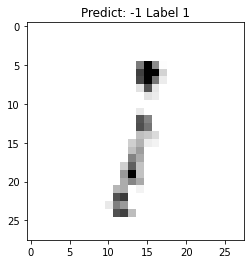

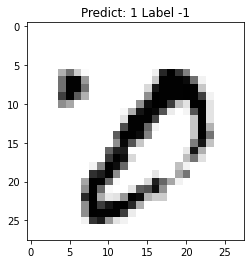


w : Gausian


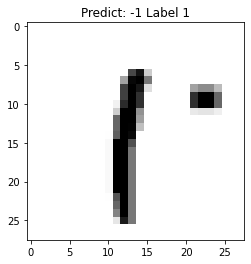

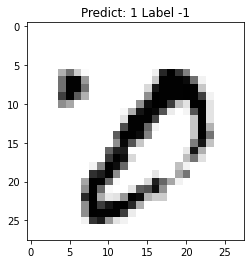


w : Uniform


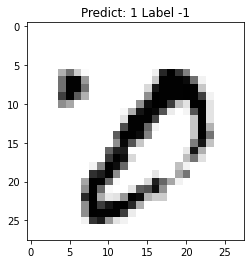

In [157]:
# 각각의 weight에 대해서 독립적으로 수행.
for i, w in enumerate(weights):
  print("\nw : {}".format(temp[i]))
  # 잘못 예측한 값 imshow
  misclassifiedShow(Xts_01, yts_01, w)

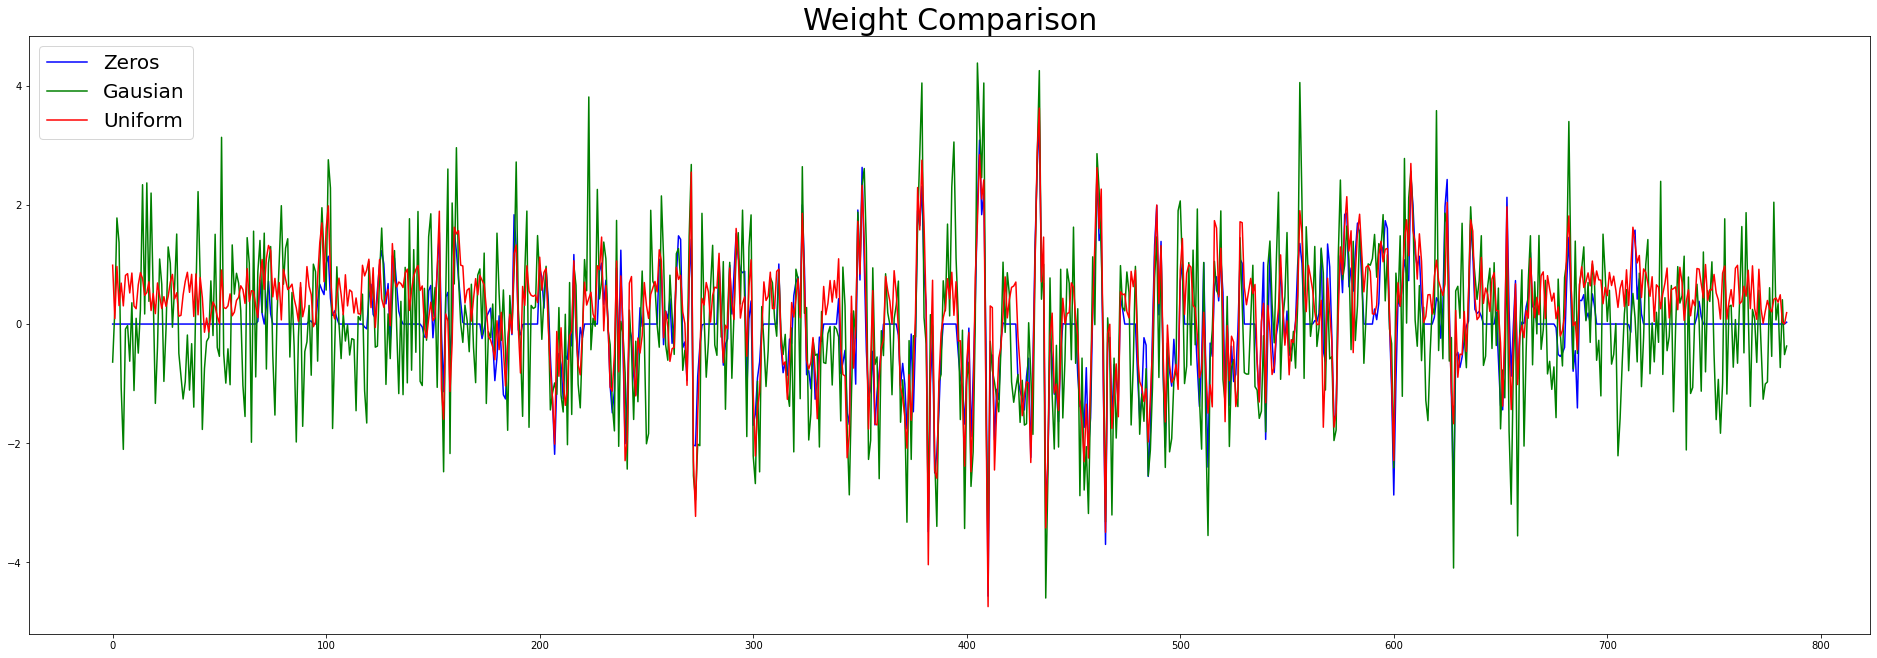

In [162]:
# 초기 w의 차이에 의해서 최종 w가 어떻게 차이나는지 궁금해서 작성해 보았습니다.

x = np.arange(28 * 28 + 1)
plt.figure(figsize=(33,11))
plt.plot(x, weights[0], 'b', label='Zeros')
plt.plot(x, weights[1], 'g', label='Gausian')
plt.plot(x, weights[2], 'r', label='Uniform')

plt.title('Weight Comparison', fontsize = 30)
plt.legend(fontsize = 20,  loc = 2)
plt.show()
